1.

In [6]:
def estimate(x, y, x0, h):
    w = np.exp(-(x - x0)**2 / h)
    W = np.diag(w)
    x = x[:, None]
    X = np.concatenate((np.ones(shape=x.shape), (x - x0)), axis=1)
    XTWX = X.T @ W @ X
    XTWy = X.T @ W @ y
    beta = np.linalg.inv(XTWX) @ XTWy
    Y_x0 = beta[0] + beta[1] * (0 - x0) 
    return Y_x0

In [7]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 4, 6])
x0 = 3.5
h = 0.5
estimated_value = estimate(x, y, x0, h)
print("Estimated value at x0:", estimated_value)

Estimated value at x0: 7.008996002543386


2.

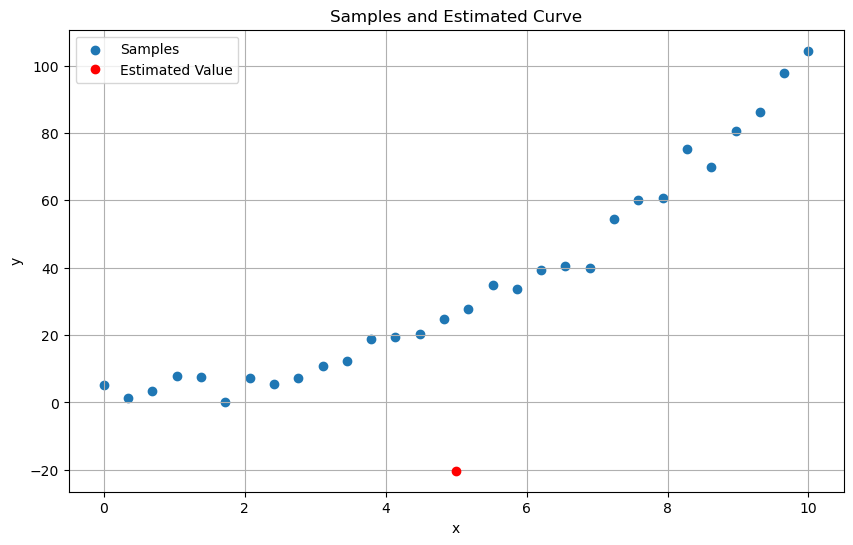

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 30 samples
np.random.seed(0)
x_samples = np.linspace(0, 10, 30)
y_samples = x_samples**2 + np.random.normal(scale=3, size=30)  # Quadratic function with some noise

# Define the estimate function
def estimate(x, y, x0, h):
    w = np.exp(-(x - x0)**2 / h)
    W = np.diag(w)
    x = x[:, None]
    X = np.concatenate((np.ones(shape=(len(x), 1)), (x - x0)), axis=1)
    theta = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y
    Y_x0 = theta[0] + theta[1] * (0 - x0)  # x0 is used for prediction, so (0 - x0) gives us the difference at x0
    return Y_x0

# Estimate curve
x0 = 5  # Choose a reasonable-looking value of x0
h = 1  # Choose a reasonable-looking value of h
estimated_value = estimate(x_samples, y_samples, x0, h)

# Plot samples and estimated curve
plt.figure(figsize=(10, 6))
plt.scatter(x_samples, y_samples, label='Samples')
plt.plot(x0, estimated_value, 'ro', label='Estimated Value')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Samples and Estimated Curve')
plt.legend()
plt.grid(True)
plt.show()

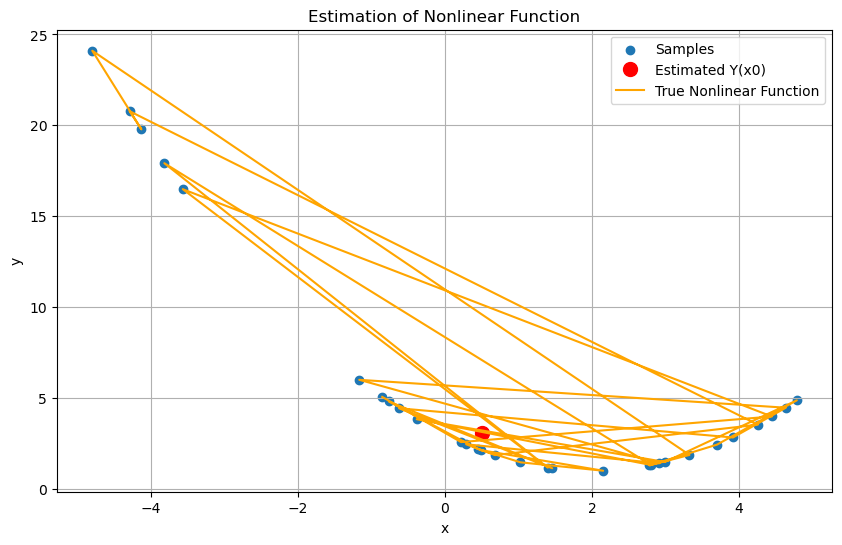

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate nonlinear y values
def generate_nonlinear_y(x):
    return 0.5 * x**2 - 2 * x + 3  # Example quadratic function

# Function to estimate Y(x0) using the estimate function
def estimate(x, y, x0, h):
    w = np.exp(-(x - x0)**2 / h)
    W = np.diag(w)
    x = x[:, None]
    X = np.concatenate((np.ones(shape=x.shape), (x - x0)), axis=1)
    XTWX = X.T @ W @ X
    XTWy = X.T @ W @ y
    beta = np.linalg.inv(XTWX) @ XTWy
    Y_x0 = beta[0] + beta[1] * (0 - x0)  # Corrected (0 - x0)
    return Y_x0

# Generate random x values
np.random.seed(0)  # For reproducibility
x = np.random.uniform(-5, 5, size=30)

# Generate corresponding y values using a nonlinear function
y = generate_nonlinear_y(x)

# Choose a value of x0 for estimation
x0 = 0.5

# Choose a reasonable bandwidth value (h)
h = 1.0

# Estimate Y(x0) using the chosen x0 and h
estimated_y = estimate(x, y, x0, h)

# Plotting the samples and estimated curve
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Samples')
plt.plot(x0, estimated_y, 'ro', label='Estimated Y(x0)', markersize=10)
plt.plot(x, generate_nonlinear_y(x), label='True Nonlinear Function', color='orange')
plt.title('Estimation of Nonlinear Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

3.  

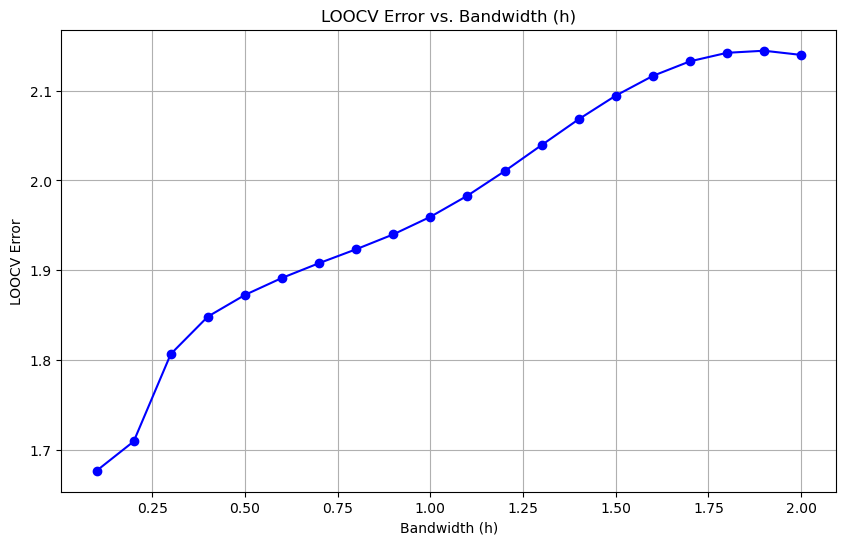

Optimal bandwidth (h) selected by LOOCV: 0.1


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the estimate function
def estimate(x, y, x0, h):
    w = np.exp(-(x - x0)**2 / h)
    W = np.diag(w)
    x = x[:, None]
    X = np.concatenate((np.ones(shape=x.shape), (x - x0)), axis=1)
    XTWX = X.T @ W @ X
    XTWy = X.T @ W @ y
    beta = np.linalg.inv(XTWX) @ XTWy
    Y_x0 = beta[0] + beta[1] * (x0 - x0)
    return Y_x0

# Function to perform LOOCV for bandwidth selection
def LOOCV_bandwidth_selection(x, y, h_values):
    loocv_errors = []

    for h in h_values:
        mse_total = 0

        for i in range(len(x)):
            x_i = np.delete(x, i)  # Leave out the i-th data point
            y_i = np.delete(y, i)

            # Estimate Y(x_i) using the remaining data points
            estimated_y_i = estimate(x_i, y_i, x[i], h)

            # Calculate squared error for the left-out point
            mse_i = (y[i] - estimated_y_i)**2
            mse_total += mse_i

        # Calculate mean squared error (MSE) for the current h
        loocv_error = mse_total / len(x)
        loocv_errors.append(loocv_error)

    # Find the index of the minimum LOOCV error
    best_h_index = np.argmin(loocv_errors)
    best_h = h_values[best_h_index]

    return best_h, loocv_errors

# Generate data (x, y)
np.random.seed(0)
x = np.random.uniform(-5, 5, size=30)
y = 0.5 * x**2 - 2 * x + 3 + np.random.normal(0, 1, size=30)  # Nonlinear function with noise

# Range of bandwidth values to evaluate
h_values = np.linspace(0.1, 2.0, 20)

# Perform LOOCV for bandwidth selection
best_h, loocv_errors = LOOCV_bandwidth_selection(x, y, h_values)

# Plotting LOOCV errors for different h values
plt.figure(figsize=(10, 6))
plt.plot(h_values, loocv_errors, marker='o', linestyle='-', color='b')
plt.title('LOOCV Error vs. Bandwidth (h)')
plt.xlabel('Bandwidth (h)')
plt.ylabel('LOOCV Error')
plt.grid(True)
plt.show()

print(f"Optimal bandwidth (h) selected by LOOCV: {best_h}")
